In [1]:
# import pandas as pd
# import numpy as np
# import os
# import PIL
# from PIL import Image
# from glob import glob
# from sklearn.model_selection import train_test_split
# import tensorflow as tf

# # 데이터 경로 및 레이블 로드
# base_path = './'
# train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))

# # 데이터 준비 - 이미지 크기 조정 및 정규화
# path = './train_folder/train/'
# folders = ['Queen', 'King', 'Knight', 'Bishop', 'Pawn', 'Rook']

# training_images = []
# training_labels = []

# def resize_image(img):
#     img_resized = img.resize((224, 224))  # 이미지 크기를 224x224로 조정
#     img_array = np.array(img_resized)
#     return img_array.astype(np.float32) / 255.0  # 이미지를 부동 소수점 형태로 변환하고 정규화

# for folder in folders:
#     folder_path = os.path.join(path, folder)
#     for ext in ['*.jpg']:
#         for img_path in glob(os.path.join(folder_path, ext)):
#             an_img = PIL.Image.open(img_path)
#             if an_img.mode != 'RGB':
#                 an_img = an_img.convert('RGB')  # 다른 모드의 이미지를 RGB로 변환
#             img_array = resize_image(an_img)
#             training_images.append(img_array)
#             training_labels.append(folder)

# training_images = np.array(training_images)
# training_labels = np.array(training_labels)

# # 데이터 증강
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# image_generator = ImageDataGenerator(
#     rotation_range=30,
#     brightness_range=[0.2, 1.0],
#     zoom_range=0.05,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     shear_range=0.2
# )

# augment_size = 2000
# np.random.seed(42)
# random_mask = np.random.randint(training_images.shape[0], size=augment_size)
# training_image_aug = training_images[random_mask].copy()
# training_labels_aug = training_labels[random_mask].copy()

# training_image_aug = image_generator.flow(training_image_aug, np.zeros(augment_size),
#                                           batch_size=augment_size, shuffle=False, seed=42).next()[0]

# training_images = np.concatenate((training_images, training_image_aug))
# training_labels = np.concatenate((training_labels, training_labels_aug))

# # 데이터 분할 - 훈련 및 검증 데이터셋 구성
# training_labels = tf.one_hot(training_labels, 6)

# X_train, X_valid, y_train, y_valid = train_test_split(training_images,
#                                                       training_labels,
#                                                       test_size=0.05,
#                                                       stratify=training_labels,
#                                                       random_state=42)

# # 테스트 데이터 준비
# path = './test_folder/test/'
# valid_extensions = ['.jpg']
# test_images = []
# test_idx = []

# def resize_image(img):
#     img_resized = img.resize((224, 224))
#     img_array = np.array(img_resized)
#     return img_array

# flist = sorted(glob(path + '*'))

# for filename in flist:
#     if any(ext in filename for ext in valid_extensions):
#         an_img = PIL.Image.open(filename)
#         resized_img = resize_image(an_img)
#         test_images.append(resized_img)
#         label = os.path.basename(filename)
#         test_idx.append(label)

# test_images = np.array(test_images)

# # 출력 확인
# print("Training Images shape:", training_images.shape)
# print("Training Labels shape:", training_labels.shape)
# print("X_train shape:", X_train.shape)
# print("X_valid shape:", X_valid.shape)
# print("y_train shape:", y_train.shape)
# print("y_valid shape:", y_valid.shape)
# print("Test Images shape:", test_images.shape)
# print("Test Indexes:", test_idx[:5])

# ## '전남대딥러닝 코드'


In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import glob
import seaborn as sns
import tensorflow as tf
from  tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, InputLayer, Resizing
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Flatten, RandomRotation, RandomTranslation, RandomFlip, RandomContrast
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import cohen_kappa_score
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
# import os

# folder_path = 'c:/Users/smlle/deeplearning/test'  # 해당 폴더의 경로로 바꿔주세요

# # 해당 폴더 안의 모든 파일 목록 가져오기
# files = os.listdir(folder_path)

# # 폴더 안의 모든 파일에 대해 반복
# for file in files:
#     file_path = os.path.join(folder_path, file)

#     # 파일인지 확인 후 확장자 변경
#     if os.path.isfile(file_path):
#         file_name, file_extension = os.path.splitext(file)

#         # 확장자를 .jpg로 변경
#         new_file_path = os.path.join(folder_path, file_name + '.jpg')
#         os.rename(file_path, new_file_path)
#         print(f"{file}의 확장자를 .jpg로 변경했습니다.")

# print("모든 파일의 확장자를 .jpg로 변경했습니다.")


In [4]:
# pip install selenium

In [5]:
# pip install bs4

In [6]:
# pip install --upgrade pip

In [7]:
# # Load module
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys
# from bs4 import BeautifulSoup
# import chromedriver_autoinstaller  # 수정: chromedriver_autoinstaller로 임포트 이름 변경
# import time, math, os, sys

# # Receive input from the user (search term, number of collections)
# query_txt = input("검색어를 입력하세요: ")
# user_cnt = int(input("몇 개를 수집하시겠습니까: "))

# # Calculate page count
# page_cnt = math.ceil(user_cnt / 30)

# # Enter search term and access website (Naver VIEW)
# try:
#     chromedriver_autoinstaller.install()  # chromedriver_autoinstaller를 사용하여 Chrome 드라이버를 설치 및 업데이트
#     driver = webdriver.Chrome('c:/py_temp/Chromedriver.exe')
#     address = "https://search.naver.com/search.naver?query="

#     driver.get(address + query_txt + '&nso=&where=blog&sm=tab_opt')
#     time.sleep(2)
#     driver.maximize_window()
# except NameError:
#     print("페이지를 열 수 없습니다.")

# # Page scrolling to collect web data
# pgdn = 0
# while pgdn < page_cnt:
#     time.sleep(2)
#     driver.find_element(By.XPATH, '//body').send_keys(Keys.END)
#     pgdn += 1

# # Web data collection - Save the entire HTML of the current page to the soup variable and close the browser
# soup = BeautifulSoup(driver.page_source, 'html.parser')
# time.sleep(5)
# driver.close()

# # Import web data - blog information
# view_total = soup.find_all('div', class_='total_wrap api_ani_send')

# # Functionalization of data collection function
# def user_scrap():
#     no = 0
#     for idx, _ in enumerate(view_total, start=1):
#         if no != user_cnt:
#             print(idx, view_total[no].get_text().replace(
#                 'Save document in Keep Go to Keep', '').replace('\n', '').strip() + '\n')
#             no += 1

# # Save web collected data
# with open('c:/py_temp/naver_blog.txt', 'a', encoding='UTF-8') as file:
#     sys.stdout = file
#     user_scrap()

# sys.stdout = sys.__stdout__  # 원래 출력 함수로 복원


In [8]:
# import zipfile
# import os

# # 현재 주피터 노트북 파일 경로 확인
# current_directory = os.getcwd()

# # 압축 파일 경로
# zip_file_path = os.path.join(current_directory, 'train.zip')

# # 압축 해제할 폴더 경로 (새로운 폴더 생성)
# extract_folder_path = os.path.join(current_directory, 'train_folder')

# # 폴더가 존재하지 않으면 생성
# if not os.path.exists(extract_folder_path):
#     os.makedirs(extract_folder_path)

# # 압축 풀기
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_folder_path)

# print("압축 파일이 성공적으로 해제되었습니다.")


In [9]:
# import zipfile
# import os

# # 현재 주피터 노트북 파일 경로 확인
# current_directory = os.getcwd()

# # 압축 파일 경로
# zip_file_path = os.path.join(current_directory, 'test.zip')

# # 압축 해제할 폴더 경로 (새로운 폴더 생성)
# extract_folder_path = os.path.join(current_directory, 'test_folder')

# # 폴더가 존재하지 않으면 생성
# if not os.path.exists(extract_folder_path):
#     os.makedirs(extract_folder_path)

# # 압축 풀기
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_folder_path)

# print("압축 파일이 성공적으로 해제되었습니다.")


In [10]:

# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/deeplearning'


In [11]:
base_path = './'

# train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))

In [12]:
# import cv2
# import os
# import pandas as pd
# import random

# base_path = './'  # 기본 경로 설정
# augmentation_size = 2  # 증강할 이미지 개수
# folders = ['Bishop', 'Queen', 'Knight', 'King', 'Pawn', 'Rook']  # 폴더 목록

# data = {'image': [], 'label': []}

# for folder in folders:
#     dataset_folder = os.path.join(base_path, f'train_folder/train/{folder}')
#     images = [f for f in os.listdir(dataset_folder) if os.path.isfile(os.path.join(dataset_folder, f))]

#     for image_name in images:
#         image_path = os.path.join(dataset_folder, image_name)
#         img = cv2.imread(image_path)

#         if img is not None:
#             for i in range(augmentation_size):
#                 flip = random.choice([0])
#                 flipped_img = cv2.flip(img, flip)

#                 noise = np.random.normal(0, 0.1, img.size)
#                 noise = noise.reshape(img.shape[0], img.shape[1], img.shape[2]).astype('uint8')
#                 noisy_img = cv2.addWeighted(img, 0.75, noise, 0.25, 0)

#                 new_filename = f"{image_name[:-4]}_{i}.jpg"
#                 save_path = os.path.join(dataset_folder, new_filename)
#                 cv2.imwrite(save_path, noisy_img)
#                 data['image'].append(new_filename)
#                 data['label'].append(folder)

# # 데이터프레임 생성
# train_df = pd.DataFrame(data)


In [13]:
import os
import pandas as pd

base_path = './'  # 기본 경로 설정
folders = ['Bishop', 'Queen', 'Knight', 'King', 'Pawn', 'Rook']  # 폴더 목록

data = {'image': [], 'label': []}

for folder in folders:
    dataset_folder = os.path.join(base_path, f'train_folder/train/{folder}')
    images = [f for f in os.listdir(dataset_folder) if os.path.isfile(os.path.join(dataset_folder, f))]

    for image_name in images:
        data['image'].append(image_name)
        data['label'].append(folder)

# 데이터프레임 생성
merged_df = pd.DataFrame(data)


In [14]:
# import cv2
# import os
# import pandas as pd
# import random

# # 증강할 이미지 개수를 목표로 하는 이미지 개수로 설정
# augmentation_size = 2  # 목표로 하는 이미지 개수

# # 데이터셋이 있는 폴더 경로 설정
# dataset_folder = os.path.join(base_path, 'train_folder/train/Bishop')

# # 이미지 파일만을 선택
# images = [f for f in os.listdir(dataset_folder) if os.path.isfile(os.path.join(dataset_folder, f))]

# # 데이터프레임 초기화
# data = {'image': [], 'label': []}

# # 각 이미지에 대해 증강 및 데이터프레임에 추가
# for image_name in images:
#     image_path = os.path.join(dataset_folder, image_name)
#     img = cv2.imread(image_path)

#     if img is not None:
#         # 이미지 증강을 위한 반복 작업 (회전, 반전, 노이즈 추가 등)
#         for i in range(augmentation_size):

#             # 반전
#             flip = random.choice([0])
#             flipped_img = cv2.flip(rotated_img, flip)

#             # 노이즈 추가
#             noise = np.random.normal(0, 0.1, img.size)
#             noise = noise.reshape(img.shape[0], img.shape[1], img.shape[2]).astype('uint8')
#             noisy_img = cv2.addWeighted(img, 0.75, noise, 0.25, 0)

#             # 이미지 저장 및 데이터프레임에 정보 추가
#             new_filename = f"{image_name[:-4]}_{i}.jpg"
#             save_path = os.path.join(dataset_folder, new_filename)
#             cv2.imwrite(save_path, noisy_img)
#             data['image'].append(new_filename)
#             data['label'].append('Bishop')

# # 데이터프레임 생성
# train_df = pd.DataFrame(data)


In [15]:
# # 이미지 증강 및 생성한 데이터프레임
# # (이미지 경로와 라벨을 가진 train_df)
# # 위에서 생성한 train_df와 train.csv 파일을 합치고자 함

# import pandas as pd
# import os

# # 기존 train.csv 파일 불러오기
# base_path = './'
# train_csv_path = os.path.join(base_path, 'train.csv')
# train_df_original = pd.read_csv(train_csv_path)

# # 증강된 이미지 데이터프레임(train_df)와 기존 train.csv를 병합
# merged_df = pd.concat([train_df_original, train_df], ignore_index=True)

# # 결과를 확인
# print(merged_df.head())

# # 병합한 데이터프레임을 새로운 CSV 파일로 저장하려는 경우
# merged_csv_path = os.path.join(base_path, 'merged_train.csv')
# merged_df.to_csv(merged_csv_path, index=False)


In [16]:
# import cv2
# import os
# import numpy as np
# import random

# # 증강할 이미지 개수
# augmentation_size = 2

# # 데이터셋이 있는 폴더 경로
# dataset_folder = os.path.join(base_path, 'train_folder/train/Bishop')

# # 이미지 목록 가져오기
# images = os.listdir(dataset_folder)

# # 모든 이미지에 대해 증강
# for image_name in images:
#     image_path = os.path.join(dataset_folder, image_name)
#     img = cv2.imread(image_path)

#     if img is not None:
#         # 이미지 증강을 위한 기법들 (여기서는 회전, 반전, 노이즈 추가를 사용하겠습니다)
#         for i in range(augmentation_size):
#             # 회전
#             angle = random.randint(-30, 30)
#             rows, cols, _ = img.shape
#             M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
#             rotated_img = cv2.warpAffine(img, M, (cols, rows))

#             # 반전
#             flip = random.choice([0, 1, -1])
#             flipped_img = cv2.flip(rotated_img, flip)

#             # 노이즈 추가
#             noise = np.random.normal(0, 1, img.size)
#             noise = noise.reshape(img.shape[0], img.shape[1], img.shape[2]).astype('uint8')
#             noisy_img = cv2.addWeighted(img, 0.75, noise, 0.25, 0)

#             # 이미지 저장
#             file_name, ext = os.path.splitext(image_name)
#             new_file_name = f"{file_name}_{i + 1}{ext}"
#             save_path = os.path.join(dataset_folder, new_file_name)
#             cv2.imwrite(save_path, noisy_img)
#     else:
#         print(f"Failed to load image: {image_path}")


In [18]:
merged_df

,image,label
0,Bishop_34_0.jpg,Bishop
1,Bishop_67_1.jpg,Bishop
2,Bishop_42_1.jpg,Bishop
3,Bishop_69_1.jpg,Bishop
4,Bishop_96_1.jpg,Bishop
...,...,...
1793,Rook_31_1.jpg,Rook
1794,Rook_66_1.jpg,Rook
1795,Rook_39_1.jpg,Rook
1796,Rook_36_0.jpg,Rook


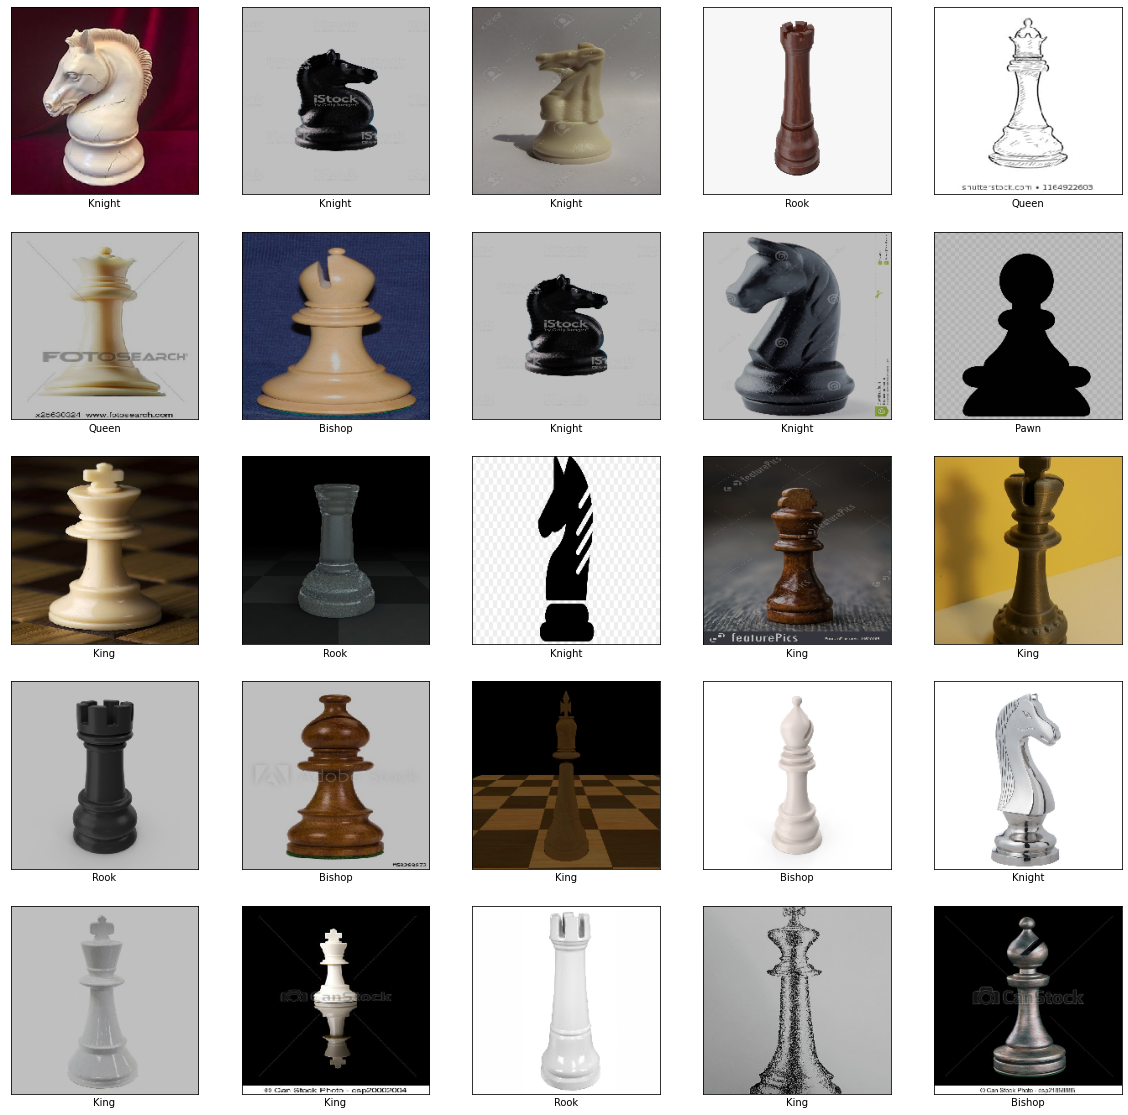

In [19]:
# 이미지 시각화
train_path = base_path +'/train_folder/train'

plt.figure(figsize=(20,20))
index = np.random.randint(len(merged_df), size=25)
for i in range(25):
    label = merged_df['label'][index[i]]
    path_img = merged_df['image'][index[i]]
    path_img = os.path.join(train_path, os.path.join(label, path_img))

    img = image.load_img(path_img,target_size=(224,224))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(label)
plt.show()

In [20]:
# # 이미지 시각화
# train_path = base_path +'/train_folder/train'

# plt.figure(figsize=(20,20))
# index = np.random.randint(len(train_df), size=25)
# for i in range(25):
#     label = train_df['label'][index[i]]
#     path_img = train_df['image'][index[i]]
#     path_img = os.path.join(train_path, os.path.join(label, path_img))

#     img = image.load_img(path_img,target_size=(224,224))
#     img_tensor = image.img_to_array(img)
#     img_tensor = np.expand_dims(img_tensor, axis=0)
#     img_tensor /= 255.
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(img, cmap=plt.cm.binary)
#     plt.xlabel(label)
# plt.show()

In [21]:
# import cv2
# import os
# import numpy as np
# import pandas as pd
# import random

# # 이미지 증강 함수 정의
# def augment_image(img):
#     # 회전
#     angle = random.randint(-30, 30)
#     rows, cols, _ = img.shape
#     M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
#     rotated_img = cv2.warpAffine(img, M, (cols, rows))

#     # 반전
#     flip = random.choice([0, 1, -1])
#     flipped_img = cv2.flip(rotated_img, flip)

#     # 노이즈 추가
#     noise = np.random.normal(0, 1, img.size)
#     noise = noise.reshape(img.shape[0], img.shape[1], img.shape[2]).astype('uint8')
#     noisy_img = cv2.addWeighted(img, 0.75, noise, 0.25, 0)
    
#     return noisy_img

# # 데이터셋 폴더 경로 설정
# # 기본 폴더 경로를 설정해주세요.
# dataset_folder = os.path.join(base_path, 'train_folder/train')

# # 모든 클래스의 폴더 목록
# class_folders = os.listdir(dataset_folder)

# # 데이터프레임 초기화
# data = {'image': [], 'label': []}

# # 각 클래스 폴더별로 이미지 증강 진행
# for class_folder in class_folders:
#     class_path = os.path.join(dataset_folder, class_folder)
#     images = os.listdir(class_path)
    
#     for image_name in images:
#         image_path = os.path.join(class_path, image_name)
#         img = cv2.imread(image_path)
        
#         if img is not None:
#             # 5번의 증강 수행
#             for _ in range(3):
#                 # 이미지 증강
#                 augmented_img = augment_image(img)
                
#                 # 증강된 이미지 데이터를 데이터프레임에 추가
#                 data['image'].append(augmented_img)
#                 data['label'].append(class_folder)

# # 데이터프레임 생성
# df = pd.DataFrame(data)


In [22]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(merged_df, test_size=0.25, stratify=merged_df['label'])
train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)

In [23]:
train['image'] = train['image'].map(lambda x: x.split('_')[0]+'/'+x)
train.head(10)

,image,label
0,King/King_54.jpg,King
1,Queen/Queen_6_1.jpg,Queen
2,Rook/Rook_17.jpg,Rook
3,Pawn/Pawn_86.jpg,Pawn
4,Knight/Knight_84.jpg,Knight
5,Pawn/Pawn_94_0.jpg,Pawn
6,Bishop/Bishop_48_1.jpg,Bishop
7,Knight/Knight_52_0.jpg,Knight
8,King/King_8_1.jpg,King
9,King/King_22.jpg,King


In [24]:
valid['image'] = valid['image'].map(lambda x: x.split('_')[0]+'/'+x)
valid.head(10)

,image,label
0,King/King_46_0.jpg,King
1,Bishop/Bishop_69.jpg,Bishop
2,Bishop/Bishop_76_0.jpg,Bishop
3,Knight/Knight_59_0.jpg,Knight
4,Pawn/Pawn_54_0.jpg,Pawn
5,Bishop/Bishop_68_1.jpg,Bishop
6,Queen/Queen_15_1.jpg,Queen
7,Rook/Rook_14_0.jpg,Rook
8,Pawn/Pawn_82_0.jpg,Pawn
9,Knight/Knight_71_0.jpg,Knight


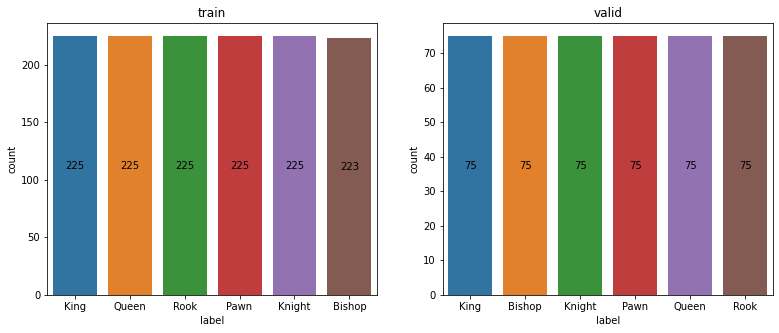

In [25]:
# 분할 후 데이터 분포

figure, ax = plt.subplots(1, 2, figsize=(13,5))
sns.countplot(data=train, x='label', ax=ax[0])
sns.countplot(data=valid, x='label', ax=ax[1])

ax[0].set_title('train')
for patch in ax[0].patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    text_msg = str(int(patch.get_height()))
    ax[0].text(label_x, label_y, text_msg, horizontalalignment='center', verticalalignment='center')

ax[1].set_title('valid')
for patch in ax[1].patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    text_msg = str(int(patch.get_height()))
    ax[1].text(label_x, label_y, text_msg, horizontalalignment='center', verticalalignment='center')

plt.show()

In [26]:
# 데이터 증강

height, width, channel = (224, 224, 3)
batch_size = 16
labels = ['sunny', 'snow', 'rain', 'dust', 'fog']

train_datagen= ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  brightness_range = [0.8, 1.0],
#                                   zoom_range=0.05,
                                  width_shift_range=0.2,
#                                   height_shift_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False ,
                                  fill_mode='nearest')
#                                   shear_range=0.2)



train_generator = train_datagen.flow_from_dataframe(train,
                                                   directory = train_path,
                                                   x_col='image',
                                                   y_col='label',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   color_mode= 'rgb',
                                                   target_size=(height, width))




valid_datagen = ImageDataGenerator(rescale=1. / 255.)

valid_generator = valid_datagen.flow_from_dataframe(valid,
                                                   directory = train_path,
                                                   x_col='image',
                                                   y_col='label',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   color_mode= 'rgb',
                                                   target_size=(height, width))

Found 1348 validated image filenames belonging to 6 classes.
Found 450 validated image filenames belonging to 6 classes.


In [42]:
# # 데이터 증강 시각화

# pred2label={}
# for x in train_generator.class_indices.keys():
#     pred2label[train_generator.class_indices[x]] = x


# plt.figure(figsize=(20,15))
# index = np.random.randint(len(merged_df), size=batch_size)
# x_augs, y_augs = train_generator.next()
# for i in range(16):
#     plt.subplot(4,4,i+1)
#     plt.imshow(x_augs[i, :, :, :])
#     plt.title(pred2label[np.argmax(y_augs[i, :])], fontsize=30)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
# plt.tight_layout()
# plt.show()

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# LabelEncoder를 사용하여 레이블을 숫자로 변환
label_encoder = LabelEncoder()
train['label_encoded'] = label_encoder.fit_transform(train['label'])
valid['label_encoded'] = label_encoder.transform(valid['label'])

# 결과 확인
print(train.head())
print(valid.head())


                  image   label  label_encoded
0      King/King_54.jpg    King              1
1   Queen/Queen_6_1.jpg   Queen              4
2      Rook/Rook_17.jpg    Rook              5
3      Pawn/Pawn_86.jpg    Pawn              3
4  Knight/Knight_84.jpg  Knight              2
                    image   label  label_encoded
0      King/King_46_0.jpg    King              1
1    Bishop/Bishop_69.jpg  Bishop              0
2  Bishop/Bishop_76_0.jpg  Bishop              0
3  Knight/Knight_59_0.jpg  Knight              2
4      Pawn/Pawn_54_0.jpg    Pawn              3


## =========================================

# VGG19 학습

In [44]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# ... (주어진 코드)

# VGG19 모델 불러오기 (사전 훈련된 가중치 사용)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# TF 층 파인튜닝을 위해 마지막에 Fully Connected Layer 추가
x = base_model.output
x = Flatten()(x)
x = Dense(32, activation='relu')(x)  
predictions = Dense(6, activation='softmax')(x)  # 분류 클래스 수에 맞는 출력 레이어


In [45]:
# 새로운 모델 구성 (기존 VGG19과 새로 추가한 레이어들을 포함)
model = Model(inputs=base_model.input, outputs=predictions)

# 기존 VGG19의 가중치는 동결하여 학습 방지
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일 및 학습 설정
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



/home/jovyan/.venv/tf2.6.0-keras2.6.0-py3.8-cuda11.3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [46]:
# 모델 컴파일 진행 - 아까와 달리 categorical_crossentropy 사용 > label이 숫자형 데이터이므로
model.compile(optimizer = Adam(learning_rate= 0.001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])


# 조기멈춤
stop = EarlyStopping(patience=15)

# 자동 저장
checkpoint = ModelCheckpoint("./best_model.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1,save_best_only=True)
callbacks = [stop, checkpoint]

# 모델 fitting
save = model.fit(train_generator,epochs =50, validation_data=valid_generator, batch_size=32, callbacks=callbacks)

Epoch 1/50
51/85 [=================>............] - ETA: 14s - loss: 2.6564 - accuracy: 0.4694

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


85/85 [==============================] - 57s 588ms/step - loss: 1.9165 - accuracy: 0.5712 - val_loss: 0.5783 - val_accuracy: 0.7889

Epoch 00001: val_accuracy improved from -inf to 0.78889, saving model to ./best_model.h5
Epoch 2/50
85/85 [==============================] - 44s 520ms/step - loss: 0.4201 - accuracy: 0.8605 - val_loss: 0.3528 - val_accuracy: 0.8733

Epoch 00002: val_accuracy improved from 0.78889 to 0.87333, saving model to ./best_model.h5
Epoch 3/50
85/85 [==============================] - 47s 560ms/step - loss: 0.2388 - accuracy: 0.9295 - val_loss: 0.2885 - val_accuracy: 0.8978

Epoch 00003: val_accuracy improved from 0.87333 to 0.89778, saving model to ./best_model.h5
Epoch 4/50
85/85 [==============================] - 48s 560ms/step - loss: 0.2229 - accuracy: 0.9228 - val_loss: 0.4099 - val_accuracy: 0.8533

Epoch 00004: val_accuracy did not improve from 0.89778
Epoch 5/50
85/85 [==============================] - 48s 569ms/step - loss: 0.2463 - accuracy: 0.9169 - val_


Epoch 00040: val_accuracy did not improve from 0.96222
Epoch 41/50
85/85 [==============================] - 48s 562ms/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.1657 - val_accuracy: 0.9533

Epoch 00041: val_accuracy did not improve from 0.96222
Epoch 42/50
85/85 [==============================] - 47s 554ms/step - loss: 0.0250 - accuracy: 0.9911 - val_loss: 0.2326 - val_accuracy: 0.9511

Epoch 00042: val_accuracy did not improve from 0.96222
Epoch 43/50
85/85 [==============================] - 47s 554ms/step - loss: 0.0356 - accuracy: 0.9859 - val_loss: 0.1655 - val_accuracy: 0.9467

Epoch 00043: val_accuracy did not improve from 0.96222
Epoch 44/50
85/85 [==============================] - 47s 553ms/step - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.1652 - val_accuracy: 0.9422

Epoch 00044: val_accuracy did not improve from 0.96222
Epoch 45/50
85/85 [==============================] - 48s 563ms/step - loss: 0.0114 - accuracy: 0.9955 - val_loss: 0.1597 - val_accuracy: 0.9578


In [47]:
print(height,  ' ', width, ' ', channel)

224   224   3


In [48]:
# model.summary()

In [49]:
# # 모델 컴파일 진행 - 아까와 달리 categorical_crossentropy 사용 > label이 숫자형 데이터이므로
# model.compile(optimizer = Adam(learning_rate= 0.001),
#                   loss = 'categorical_crossentropy',
#                   metrics=['accuracy'])


# # 조기멈춤
# stop = EarlyStopping(patience=5)

# # 자동 저장
# checkpoint = ModelCheckpoint("./best_model",monitor='val_accuracy',
#                             save_weights_only=True, mode='max',verbose=1,save_best_only=True)
# callbacks = [stop, checkpoint]

# # 모델 fitting
# save = model.fit(train_generator,epochs =50, validation_data=valid_generator, batch_size=32, callbacks=callbacks)

In [50]:
# test_df = pd.read_csv(base_path + "/test.csv")
# test_df.head(5)

In [51]:
# batch_size = len(test_df["image"])
# height, width, channel = 224, 224, 3

In [52]:
# # 테스트 이미지를 메모리에 올림.
# test_path = base_path + '/test_folder/test'

# test_image = np.zeros((batch_size, height, width, channel))
# print(test_image.shape)
# cnt=0
# for i in range(len(test_df["image"])):
#     path_img = test_df['image'][i]
#     img = image.load_img(os.path.join(test_path,path_img), target_size=(height, width))
#     img_tensor = image.img_to_array(img)
#     img_tensor = np.array(img_tensor,dtype="float32")

#     img_tensor /= 255

#     img_tensor = np.expand_dims(img_tensor, axis=0)

#     test_image[i] = img_tensor

In [53]:
# predictions = model.predict(test_image)
# predictions.shape

In [54]:
# test_df['label'] = [pred2label[np.argmax(pred)] for pred in predictions]
# test_df

In [55]:
# test_df.to_csv('./submission1.csv', index=False)

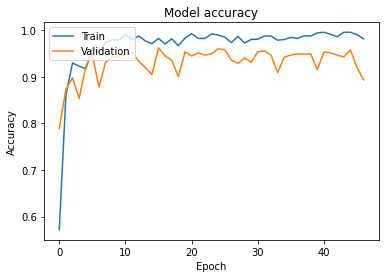

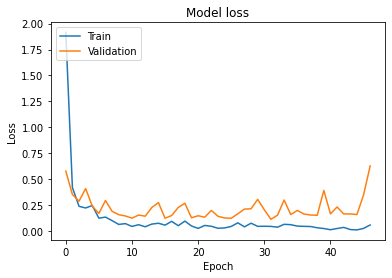

In [56]:
import matplotlib.pyplot as plot

# history = model.fit(train_generator,epochs =50, validation_data=valid_generator, batch_size=32, callbacks=callbacks)

# 정확도 그래프
plot.plot(save.history['accuracy'])
plot.plot(save.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Validation'], loc='upper left')
plot.show()

# 손실 그래프
plot.plot(save.history['loss'])
plot.plot(save.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Validation'], loc='upper left')
plot.show()



# plot.plot(data.history['accuracy'])
# plot.plot(data.history['val_accuracy'])
# plot.title('Model accuracy')
# plot.ylabel('Accuracy')
# plot.xlabel('Epoch')
# plot.legend(['Train', 'Test'], loc='upper left')
# plot.show()

# plot.plot(data.history['loss'])
# plot.plot(data.history['val_loss'])
# plot.title('Model loss')
# plot.ylabel('Loss')
# plot.xlabel('Epoch')
# plot.legend(['Train', 'Test'], loc='upper left')
# plot.show()

# ============================
# DenseNet 121 학습

In [57]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

NUM_CLASSES = 6

# DenseNet 모델 불러오기 (사전 훈련된 가중치 사용)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# TF 층 파인튜닝을 위해 Fully Connected Layer 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)  # 분류 클래스 수에 맞는 출력 레이어

# 새로운 모델 구성 (기존 DenseNet과 새로 추가한 레이어들을 포함)
model2 = Model(inputs=base_model.input, outputs=predictions)

# 기존 DenseNet의 가중치는 동결하여 학습 방지
for layer in base_model.layers:
    layer.trainable = False


In [58]:

# 모델 컴파일 및 학습 설정
model2.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 조기멈춤
stop = EarlyStopping(patience=15)


In [59]:

# 자동 저장
checkpoint = ModelCheckpoint("./best_model2.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1,save_best_only=True)
callbacks = [stop, checkpoint]

# 모델 fitting
save2 = model2.fit(train_generator, epochs=50, validation_data=valid_generator, batch_size=32, callbacks=callbacks)


Epoch 1/50
85/85 [==============================] - 55s 593ms/step - loss: 1.2731 - accuracy: 0.5267 - val_loss: 0.7846 - val_accuracy: 0.7311

Epoch 00001: val_accuracy improved from -inf to 0.73111, saving model to ./best_model2.h5
Epoch 2/50
85/85 [==============================] - 47s 557ms/step - loss: 0.6237 - accuracy: 0.7938 - val_loss: 0.5307 - val_accuracy: 0.8200

Epoch 00002: val_accuracy improved from 0.73111 to 0.82000, saving model to ./best_model2.h5
Epoch 3/50
85/85 [==============================] - 47s 556ms/step - loss: 0.4446 - accuracy: 0.8583 - val_loss: 0.4959 - val_accuracy: 0.7978

Epoch 00003: val_accuracy did not improve from 0.82000
Epoch 4/50
85/85 [==============================] - 48s 566ms/step - loss: 0.3433 - accuracy: 0.8880 - val_loss: 0.3578 - val_accuracy: 0.8578

Epoch 00004: val_accuracy improved from 0.82000 to 0.85778, saving model to ./best_model2.h5
Epoch 5/50
85/85 [==============================] - 48s 560ms/step - loss: 0.2728 - accuracy:

85/85 [==============================] - 46s 539ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0945 - val_accuracy: 0.9600

Epoch 00039: val_accuracy did not improve from 0.97333
Epoch 40/50
85/85 [==============================] - 47s 553ms/step - loss: 0.0197 - accuracy: 0.9963 - val_loss: 0.0728 - val_accuracy: 0.9778

Epoch 00040: val_accuracy improved from 0.97333 to 0.97778, saving model to ./best_model2.h5
Epoch 41/50
85/85 [==============================] - 47s 558ms/step - loss: 0.0170 - accuracy: 0.9978 - val_loss: 0.0919 - val_accuracy: 0.9667

Epoch 00041: val_accuracy did not improve from 0.97778
Epoch 42/50
85/85 [==============================] - 48s 559ms/step - loss: 0.0324 - accuracy: 0.9889 - val_loss: 0.0780 - val_accuracy: 0.9756

Epoch 00042: val_accuracy did not improve from 0.97778
Epoch 43/50
85/85 [==============================] - 48s 568ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0997 - val_accuracy: 0.9667

Epoch 00043: val_accuracy did

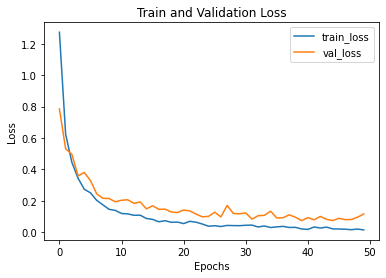

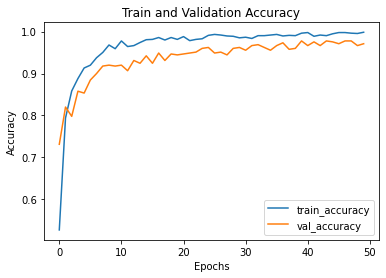

In [60]:

# loss와 accuracy에 대한 metplot 생성
plt.plot(save2.history['loss'], label='train_loss')
plt.plot(save2.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.show()

plt.plot(save2.history['accuracy'], label='train_accuracy')
plt.plot(save2.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.show()


In [61]:
# test_df = pd.read_csv(base_path + "/test.csv")
# test_df.head(5)

In [62]:
# batch_size = len(test_df["image"])
# height, width, channel = 224, 224, 3

In [63]:
# # 테스트 이미지를 메모리에 올림.
# test_path = base_path + '/test_folder/test'

# test_image = np.zeros((batch_size, height, width, channel))
# print(test_image.shape)
# cnt=0
# for i in range(len(test_df["image"])):
#     path_img = test_df['image'][i]
#     img = image.load_img(os.path.join(test_path,path_img), target_size=(height, width))
#     img_tensor = image.img_to_array(img)
#     img_tensor = np.array(img_tensor,dtype="float32")

#     img_tensor /= 255

#     img_tensor = np.expand_dims(img_tensor, axis=0)

#     test_image[i] = img_tensor

In [64]:
# predictions = model2.predict(test_image)
# predictions.shape

In [65]:
# test_df['label'] = [pred2label[np.argmax(pred)] for pred in predictions]
# test_df

In [66]:
# test_df.to_csv('./submission2.csv', index=False)

# ===========================

# 소프트보팅 실시

In [71]:
# from tensorflow.keras.models import load_model, save_model
# import numpy as np

# # 모델 저장
# save_model(model, 'best_model.h5')
# save_model(model2, 'best_model2.h5')


# # 모델 로드
# model_path1 = tf.keras.models.load_model('./best_model.h5')
# model_path2 = tf.keras.models.load_model('./best_model2.h5')

# loaded_model1 = load_model(model_path1)  # 첫 번째 모델 불러오기
# loaded_model2 = load_model(model_path2)  # 두 번째 모델 불러오기


TypeError: expected str, bytes or os.PathLike object, not Functional

In [72]:
test_df = pd.read_csv(base_path + "/test.csv")
test_df.head(5)

,image,label
0,test_0.jpg,NaN
1,test_1.jpg,NaN
2,test_2.jpg,NaN
3,test_3.jpg,NaN
4,test_4.jpg,NaN


In [73]:
batch_size = len(test_df["image"])
height, width, channel = 224, 224, 3

In [74]:
# 테스트 이미지를 메모리에 올림.
test_path = base_path + '/test_folder/test'

test_image = np.zeros((batch_size, height, width, channel))
print(test_image.shape)
cnt=0
for i in range(len(test_df["image"])):
    path_img = test_df['image'][i]
    img = image.load_img(os.path.join(test_path,path_img), target_size=(height, width))
    img_tensor = image.img_to_array(img)
    img_tensor = np.array(img_tensor,dtype="float32")

    img_tensor /= 255

    img_tensor = np.expand_dims(img_tensor, axis=0)

    test_image[i] = img_tensor

(60, 224, 224, 3)


In [75]:
# 각 모델로부터 예측 수행
preds1 = model.predict(test_image)  # 첫 번째 모델의 예측
preds2 = model2.predict(test_image)  # 두 번째 모델의 예측

# 예측 결과의 평균 계산
final_preds = (preds1 + preds2) / 2.0  # 두 모델의 예측 확률값의 평균 계산

# 가장 높은 확률을 갖는 클래스 선택 (소프트 보팅)
final_predictions = np.argmax(final_preds, axis=1)


In [76]:
final_predictions.shape

(60,)

In [82]:
test_df['label'] = [pred2label[pred] for pred in final_predictions]    # final_predictions
test_df

,image,label
0,test_0.jpg,Bishop
1,test_1.jpg,Bishop
2,test_2.jpg,Bishop
3,test_3.jpg,Bishop
4,test_4.jpg,Bishop
5,test_5.jpg,Bishop
6,test_6.jpg,Bishop
7,test_7.jpg,Bishop
8,test_8.jpg,Bishop
9,test_9.jpg,Bishop


In [83]:
test_df.to_csv('./submission_final.csv', index=False)

In [84]:
from IPython.display import FileLink

# 다운로드할 파일 경로를 포함하여 FileLink 생성
FileLink('./best_model.h5')

/home/jovyan/data07/202955/best_model.h5

In [85]:
FileLink('./final .ipynb')

/home/jovyan/data07/202955/final .ipynb

In [86]:
FileLink('./best_model2.h5')

/home/jovyan/data07/202955/best_model2.h5

In [ ]:
# 여러 파일의 경로를 포함하는 디렉토리 경로를 사용하여 FileLinks 생성
# FileLinks('./폴더명')

In [ ]:
# import matplotlib.pyplot as plot

# plot.plot(data.history['accuracy'])
# plot.plot(data.history['val_accuracy'])
# plot.title('Model accuracy')
# plot.ylabel('Accuracy')
# plot.xlabel('Epoch')
# plot.legend(['Train', 'Test'], loc='upper left')
# plot.show()

# plot.plot(data.history['loss'])
# plot.plot(data.history['val_loss'])
# plot.title('Model loss')
# plot.ylabel('Loss')
# plot.xlabel('Epoch')
# plot.legend(['Train', 'Test'], loc='upper left')
# plot.show()

In [ ]:
# test_df = pd.read_csv(base_path + "/test.csv")
# test_df.head(5)

In [ ]:
# batch_size = len(test_df["image"])
# height, width, channel = 224, 224, 3

In [ ]:
# # 테스트 이미지를 메모리에 올림.
# test_path = base_path + '/test_foler/test'

# test_image = np.zeros((batch_size, height, width, channel))
# print(test_image.shape)
# cnt=0
# for i in range(len(test_df["image"])):
#     path_img = test_df['image'][i]
#     img = image.load_img(os.path.join(test_path,path_img), target_size=(height, width))
#     img_tensor = image.img_to_array(img)
#     img_tensor = np.array(img_tensor,dtype="float32")

#     img_tensor /= 255

#     img_tensor = np.expand_dims(img_tensor, axis=0)

#     test_image[i] = img_tensor

In [ ]:
# predictions = model2.predict(test_image)
# predictions.shape

In [ ]:
# test_df['label'] = [pred2label[np.argmax(pred)] for pred in predictions]
# test_df

In [ ]:
# test_df.to_csv('./submission2.csv', index=False)

## ====================================
# 여기까지

In [32]:
from tensorflow.keras.applications import VGG19, DenseNet121
from tensorflow.keras.models import Sequential

# VGG19 모델 구성
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(height, width, channel))
model1 = Sequential()
model1.add(vgg_model)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(num_classes, activation='softmax'))

# DenseNet121 모델 구성
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(height, width, channel))
model2 = Sequential()
model2.add(densenet_model)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(num_classes, activation='softmax'))

# 두 모델의 컴파일
model1.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# VGG19 모델 학습
history_vgg = model1.fit(train_generator, epochs=50, validation_data=valid_generator, batch_size=32)

# DenseNet121 모델 학습
history_densenet = model2.fit(train_generator, epochs=50, validation_data=valid_generator, batch_size=32)

# 다시 불러와 소프트 보팅
# 모델 예측을 위한 함수 정의
def predict_models(models, generator):
    model_predictions = [model.predict(generator) for model in models]
    return np.average(model_predictions, axis=0)

# 예측할 데이터 생성 (위에서 사용한 valid_generator)
ensemble_predictions = predict_models([model1, model2], valid_generator)

# 예측된 결과
ensemble_predictions_classes = np.argmax(ensemble_predictions, axis=1)


NameError: name 'num_classes' is not defined

In [ ]:
# from glob import glob
# import numpy as np
# import PIL
# from PIL import Image
# import os

# path = './train/'       # './train_folder/train'
# folders = ['Queen', 'King', 'Knight', 'Bishop', 'Pawn', 'Rook']

# training_images = []
# training_labels = []

# # 이미지 크기 재조정하는 함수
# def resize_image(img):
#     img_resized = img.resize((128, 128))  # 이미지 크기를 224x224로 조정
#     img_array = np.array(img_resized)
#     return img_array.astype(np.float32) / 255.0  # 이미지를 부동 소수점 형태로 변환하고 정규화

# for folder in folders:
#     folder_path = os.path.join(path, folder)
#     for ext in ['*.jpg']:
#         for img_path in glob(os.path.join(folder_path, ext)):
#             an_img = PIL.Image.open(img_path)

#             # 이미지가 3 채널(RGB)인지 확인
#             if an_img.mode != 'RGB':
#                 an_img = an_img.convert('RGB')  # 다른 모드의 이미지를 RGB로 변환

#             img_array = resize_image(an_img)
#             training_images.append(img_array)
#             training_labels.append(folder)

# training_images = np.array(training_images)
# training_labels = np.array(training_labels)

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# training_labels = le.fit_transform(training_labels)
# training_labels = training_labels.reshape(-1, 1)

# print(training_images.shape)
# print(training_labels.shape)




/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(600, 128, 128, 3)
(600, 1)


In [ ]:



# from glob import glob
# import numpy as np
# import PIL
# from PIL import Image
# import os

# path = './train_folder/train/'
# folders = ['Queen', 'King', 'Knight', 'Bishop', 'Pawn', 'Rook']

# training_images = []
# training_labels = []

# def resize_image(img):
#     img_resized = img.resize((224, 224))  # 이미지 크기를 224x224로 조정
#     img_array = np.array(img_resized)
#     return img_array

# for folder in folders:
#     folder_path = os.path.join(path, folder)
#     for ext in ['*.jpg']:
#         for img_path in glob(os.path.join(folder_path, ext)):
#             an_img = PIL.Image.open(img_path)

#             # 이미지가 3 채널(RGB)인지 확인
#             if an_img.mode != 'RGB':
#                 an_img = an_img.convert('RGB')  # 다른 모드의 이미지를 RGB로 변환

#             img_array = resize_image(an_img)
#             training_images.append(img_array)
#             training_labels.append(folder)

# training_images = np.array(training_images, dtype=object)  # dtype=object로 지정
# training_labels = np.array(training_labels)

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# training_labels = le.fit_transform(training_labels)
# training_labels = training_labels.reshape(-1, 1)

# print(training_images.shape)
# print(training_labels.shape)



# from glob import glob
# import numpy as np
# import PIL
# from PIL import Image
# import os

# path = './train_folder/train/'
# folders = ['Queen', 'King', 'Knight', 'Bishop', 'Pawn', 'Rook']

# training_images = []
# training_labels = []

# # 이미지 크기 재조정하는 함수
# def resize_image(img):
#     img_resized = img.resize((224, 224))  # 이미지 크기를 224x224로 조정
#     img_array = np.array(img_resized)
#     return img_array

# for folder in folders:
#     folder_path = os.path.join(path, folder)
#     for ext in ['*.jpg']:
#         for img_path in glob(os.path.join(folder_path, ext)):
#             an_img = PIL.Image.open(img_path)  # Read image
#             img_array = resize_image(an_img)  # Resize image
#             training_images.append(img_array)  # Append array to training_images
#             training_labels.append(folder)  # Append label

# training_images = np.array(training_images)
# training_labels = np.array(training_labels)

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# training_labels = le.fit_transform(training_labels)
# training_labels = training_labels.reshape(-1, 1)

# print(training_images.shape)
# print(training_labels.shape)


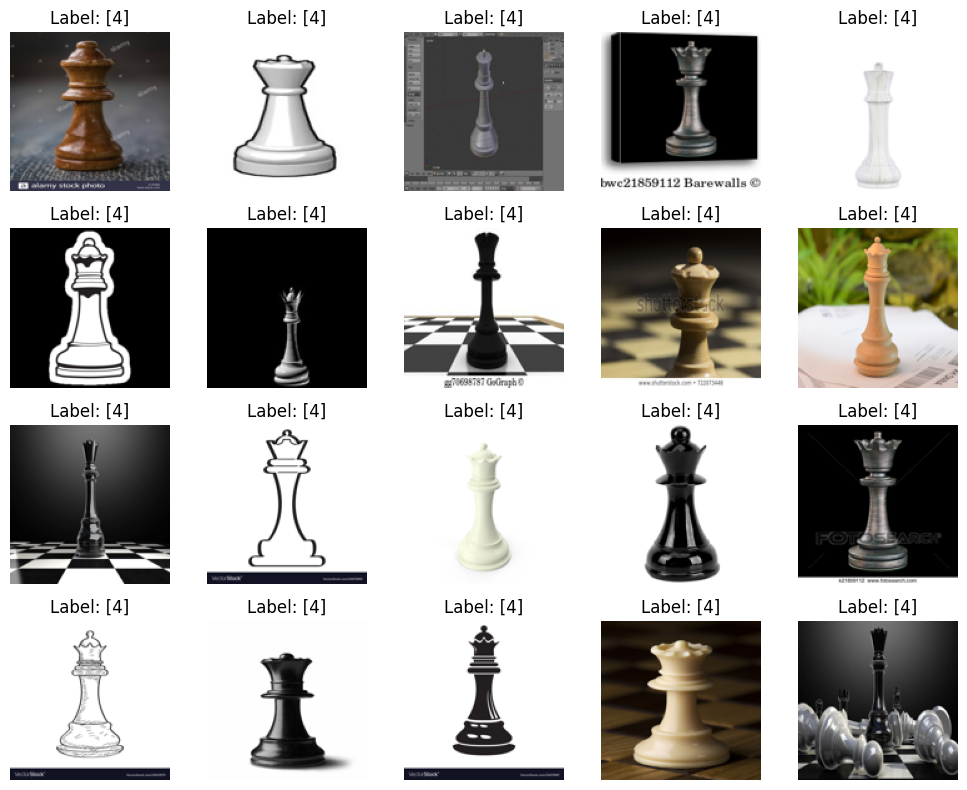

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# num_images_to_display = 20  # 표시할 이미지 수

# plt.figure(figsize=(10, 8))  # 전체 그림의 크기를 조절합니다

# for i in range(num_images_to_display):
#     plt.subplot(4, 5, i + 1)
#     plt.imshow(training_images[i])  # training_images는 이미지 데이터를 포함하는 배열입니다
#     plt.title(f"Label: {training_labels[i]}")  # training_labels는 각 이미지에 대한 레이블 정보를 담은 배열입니다
#     plt.axis('off')  # 축 제거
# plt.tight_layout()  # 레이아웃을 조정하여 각 subplot이 겹치지 않도록 합니다
# plt.show()


# # import matplotlib.pyplot as plt
# # %matplotlib inline

# # for i in range(20):
# #     plt.subplot(4, 5, i + 1)
# #     plt.imshow(training_images[i*300])
# #     print(training_labels[i*300], end=",")
# # plt.show(

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import tensorflow as tf

# tf.random.set_seed(42)

# image_generator = ImageDataGenerator(
#     rotation_range=30,
#     brightness_range = [0.2, 1.0],
#     zoom_range=0.05,

#     height_shift_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=False ,
#     fill_mode='nearest',
#     shear_range=0.2, # Random Shear(랜덤 변형)
#     #     width_shift_range=0.2,
#     # preprocessing_function=apply_gaussian_noise
# )


# # def apply_gaussian_noise(image):
# #     noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.005, dtype=tf.float32)
# #     noisy_image = tf.clip_by_value(image + noise * 0.1, 0.0, 1.0)  # 0.1은 노이즈 강도를 조절하는 매개변수입니다.
# #     return noisy_image


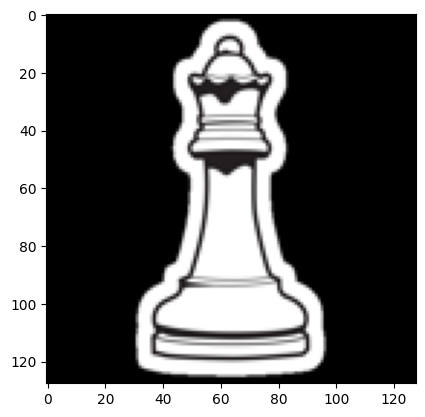

In [ ]:
# sample_image = (training_images[5] * 255).astype('uint8')  # 0~1로 정규화된 이미지 데이터를 0~255 범위로 변환
# plt.imshow(sample_image)
# plt.show()

# # sample_image = training_images[5]
# # plt.imshow(sample_image.astype('uint8'))
# # sample_image = np.expand_dims(sample_image, 0)

In [ ]:
# sample_image = np.expand_dims(sample_image, axis=0)  # 4차원으로 변경
# sample_image_it = image_generator.flow(sample_image, batch_size=1, seed=42)

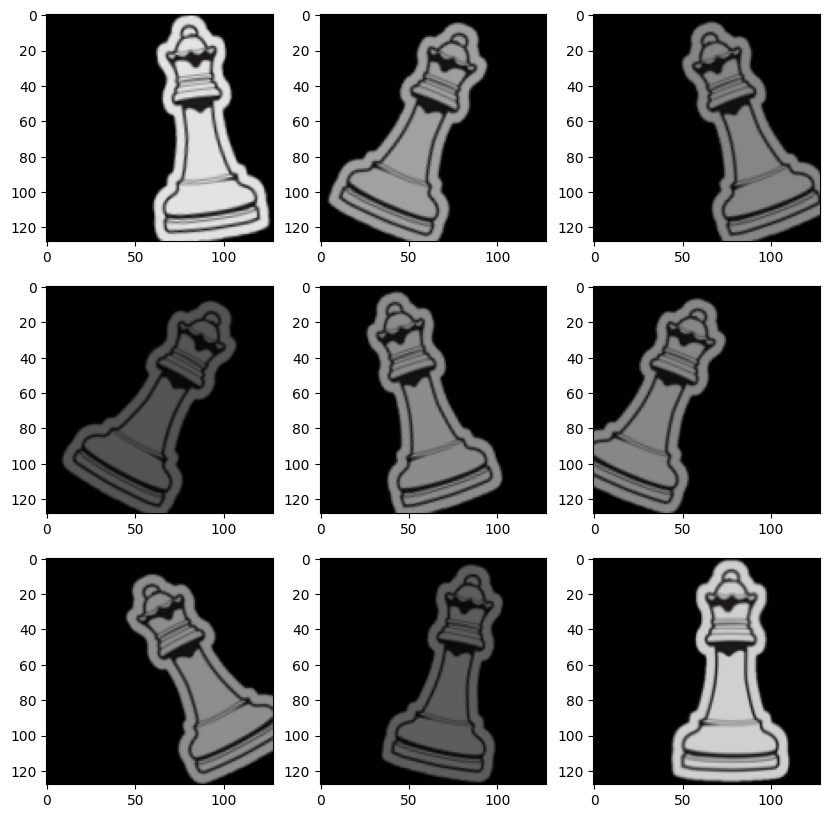

In [ ]:
# fig = plt.figure(figsize = (10,10))
# for i in range(9):
#     plt.subplot(3, 3, 1+i)
#     batch = sample_image_it.next()
#     image = batch[0].astype('uint8')
#     plt.imshow(image)
# plt.show()

In [ ]:
# augment_size=500

# np.random.seed(42)

# random_mask = np.random.randint(training_images.shape[0], size=augment_size)
# training_image_aug = training_images[random_mask].copy()
# training_labels_aug = training_labels[random_mask].copy()

In [ ]:
# training_image_aug = image_generator.flow(training_image_aug, np.zeros(augment_size), batch_size=augment_size, shuffle=False, seed = 42).next()[0]

# training_images = np.concatenate((training_images, training_image_aug))
# training_labels = np.concatenate((training_labels, training_labels_aug))

In [ ]:
# import numpy as np

# # 이전 단계에서 이미지 데이터를 로드하고 전처리한 후의 데이터를 train_images로 가정합니다.
# # ImageDataGenerator를 통해 증강된 이미지 데이터 생성
# seed = 42  # 랜덤 시드

# # 증강된 이미지를 담을 빈 리스트 생성
# augmented_images = []

# # train_images를 ImageDataGenerator를 사용하여 증강
# for image in training_images:
#     # 이미지 데이터를 확장하기 위해 reshape
#     image = image.reshape((1,) + image.shape)

#     # ImageDataGenerator를 사용하여 이미지 증강
#     augmented = image_generator.flow(image, batch_size=1, seed=seed)

#     # 생성된 이미지를 augmented_images 리스트에 추가
#     augmented_images.extend([next(augmented)[0].astype(np.uint8)])

# # augmented_images 리스트를 numpy 배열로 변환
# training_images = np.array(augmented_images)


In [ ]:
# print(training_images.shape)
# print(training_labels.shape)

(600, 128, 128, 3)
(600, 1)


## ===================================

## test, validation 제작

In [ ]:
training_labels = tf.one_hot(training_labels, 6)

In [ ]:

path = './test/' #'./test_folder/test/'
valid_extensions = ['.jpg']  # 확장자 목록

def resize_image(img):
    img_resized = img.resize((128, 128))  # 이미지 크기를 224x224로 조정
    img_array = np.array(img_resized)
    return img_array

test_images = []
test_idx = []

flist = sorted(glob(path + '*'))

for filename in flist:
    if any(ext in filename for ext in valid_extensions):
        an_img = PIL.Image.open(filename)  # 이미지 읽기
        resized_img = resize_image(an_img)  # 이미지 크기 조정
        test_images.append(resized_img)  # 배열을 test_images에 추가

        label = os.path.basename(filename)  # 파일명에서 ID 가져오기
        test_idx.append(label)  # ID를 test_idx에 추가

test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[:5])  # 처음 5개의 파일 ID 출력


(60, 128, 128, 3)
['test_0.jpg', 'test_1.jpg', 'test_10.jpg', 'test_11.jpg', 'test_12.jpg']


In [ ]:
from sklearn.model_selection import train_test_split

training_labels = np.array(training_labels)
training_labels = training_labels.reshape(-1,6) #mixup에서 one-hot 기법을 적용했다면, shape을 바꿔줍니다.

X_train, X_valid, y_train, y_valid = train_test_split(training_images,
                                                      training_labels,
                                                      test_size=0.05,
                                                      stratify = training_labels,
                                                      random_state=42)

# X_train = np.concatenate((X_train, mix_training_images)) #mixup한 75000개의 데이터를 train set에 추가해줍니다
# y_train = np.concatenate((y_train, mix_training_labels))

X_test = test_images

In [ ]:
print('X_train 크기:',X_train.shape)
print('y_train 크기:',y_train.shape)
print('X_valid 크기:',X_valid.shape)
print('y_valid 크기:',y_valid.shape)
print('X_test  크기:',X_test.shape)

X_train 크기: (570, 128, 128, 3)
y_train 크기: (570, 6)
X_valid 크기: (30, 128, 128, 3)
y_valid 크기: (30, 6)
X_test  크기: (60, 128, 128, 3)


In [ ]:
# import numpy as np

# max_value = np.max(X_test)  # X_train은 데이터셋입니다. 필요에 따라 X_valid, X_test로 변경 가능합니다.

# if max_value <= 1.0:
#     print("데이터는 이미 255로 나누어졌습니다.")
# else:
#     print("데이터는 255로 나누어지지 않았습니다.")


In [ ]:
X_test = X_test / 255.0

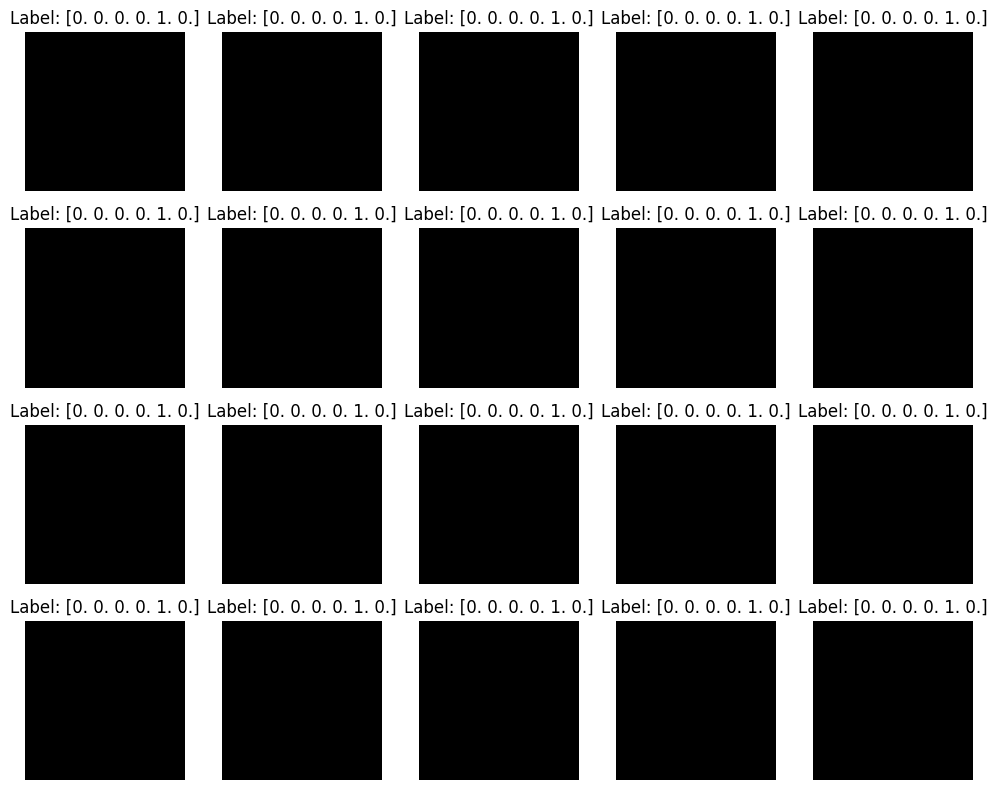

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# num_images_to_display = 20  # 표시할 이미지 수

# plt.figure(figsize=(10, 8))  # 전체 그림의 크기를 조절합니다

# for i in range(num_images_to_display):
#     plt.subplot(4, 5, i + 1)
#     plt.imshow(X_train[i])  # training_images는 이미지 데이터를 포함하는 배열입니다
#     plt.title(f"Label: {training_labels[i]}")  # training_labels는 각 이미지에 대한 레이블 정보를 담은 배열입니다
#     plt.axis('off')  # 축 제거
# plt.tight_layout()  # 레이아웃을 조정하여 각 subplot이 겹치지 않도록 합니다
# plt.show()


## =================================
## 모델학습 시작

# VGG19

In [ ]:
from tensorflow.keras.applications import VGG19

# VGG19 모델 불러오기 (사전 훈련된 가중치 사용)
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


In [ ]:

# 모델 요약 정보 출력
vgg_model.summary()


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:

# VGG19 모델의 출력을 활용하여 새로운 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 분류할 클래스 수에 맞게 설정


In [ ]:

# 전체 모델 요약 정보 출력
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 20,549,126
Trainable params: 20,549,126
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
EPOCH = 50
BATCH_SIZE = 32

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              patience=10,
                             )

reduceLR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=4,
)

In [ ]:
data = model.fit(X_train,
                 y_train,
                 validation_data=(X_valid, y_valid),
                 epochs=EPOCH,
                 batch_size=BATCH_SIZE,
                 callbacks=[reduceLR, earlystopping],)

Epoch 1/50
 3/18 [====>.........................] - ETA: 10:30 - loss: 11.7892 - accuracy: 0.0833

In [ ]:
import matplotlib.pyplot as plot

plot.plot(data.history['accuracy'])
plot.plot(data.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(data.history['loss'])
plot.plot(data.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:

# model1.save('ResNet50CL.h5')
model.save('VGG19.h5')

In [ ]:
import pandas as pd

sample_submission = pd.read_csv("./submission.csv")

sample_submission.target = pred_class
sample_submission.to_csv("submit.csv",index=False)

In [ ]:
sample_submission.head(58)